In [31]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Given the following two-dimensional data set:

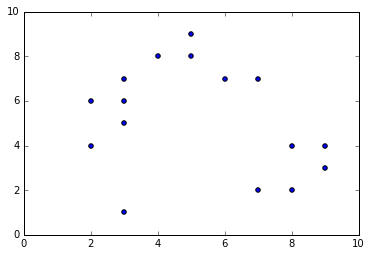

In [39]:
points = np.array([(2, 4), (2, 6), (3, 1), (3, 5), (3, 6),
                   (3, 7), (4, 8), (5, 8), (5, 9), (6, 7),
                   (7, 2), (7, 7), (8, 2), (8, 4), (9, 3), (9, 4)])

plt.scatter(points[:, 0], [points[:, 1]])
plt.axis([0, 10, 0, 10])
plt.show()

## a)
Use the heuristic from the lecture to determine input parameters $MinPts$ and $\\epsilon$ for DBSCAN
using the Manhattan distance.

$MinPts = 2 * d - 1$ with d beeing the number of dimensions.

In [35]:
def manhattan_distance(a, b):
    return abs(b[0] - a[0]) + abs(b[1] - a[1])

def k_distances(points, k=2):
    k_distances = []
    for p1 in points:
        k_distances.append(np.sort([manhattan_distance(p1, p2) for p2 in points])[k])
    return np.sort(k_distances)[::-1]

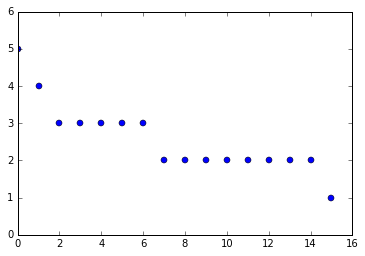

In [38]:
plt.plot(k_distances(points, k=3), 'o')
plt.axis([0, 16, 0, 6])
plt.show()

With this dispersion the user would choose $\\epsilon = 4$ or $\\epsilon = 3$.

## b)
Apply DBSCAN to the given data set using the Euclidean distance, $MinPts = 4$ and $\\epsilon = 2.2$.
Give the resulting clusters as sets of points and a list of all core objects.